In [2]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_excel('E:/Linear_regression model/truck_travel_time.xlsx')
df1

,travel_distance,n_of_deliveries,travel_time
0,100,4,9.3
1,50,3,4.8
2,100,4,8.9
3,100,2,6.5
4,50,2,4.2
5,80,2,6.2
6,75,3,7.4
7,65,4,6.0
8,90,3,7.6
9,90,2,6.1


Text(0.5, 1.0, 'Multiple regression')

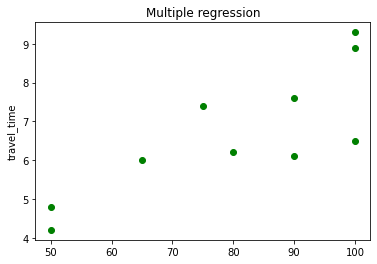

In [18]:
plt.scatter(df1['travel_distance'],df1['travel_time'],color='green')
plt.ylabel('travel_time')
plt.title('Multiple regression')
#plt.scatter(df1['n_of_deliveries'],df1['travel_time'],color='red')
#plt.ylabel('travel time')
#plt.title('no of devliveries vs travel time')

Text(0.5, 1.0, 'no of devliveries vs travel time')

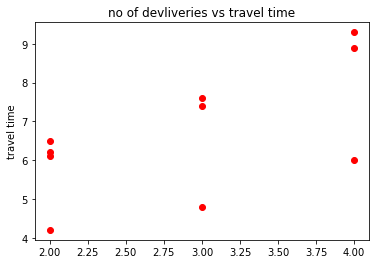

In [17]:
plt.scatter(df1['n_of_deliveries'],df1['travel_time'],color='red')
plt.ylabel('travel time')
plt.title('no of devliveries vs travel time')

In [20]:
model1 = ols(formula= 'travel_time ~ travel_distance', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sun, 28 Feb 2021   Prob (F-statistic):            0.00408
Time:                        10:29:44   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2739      1.401     

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
print(anova_lm(result1))

                  df     sum_sq    mean_sq          F   PR(>F)
travel_distance  1.0  15.871304  15.871304  15.814578  0.00408
Residual         8.0   8.028696   1.003587        NaN      NaN


In [22]:
# 2nd model by considering other variable
model2= ols(formula ='travel_time ~ travel_distance + n_of_deliveries', data = df1)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           0.000276
Time:                        10:32:03   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
print(anova_lm(result2))

                  df     sum_sq    mean_sq          F    PR(>F)
travel_distance  1.0  15.871304  15.871304  48.315660  0.000221
n_of_deliveries  1.0   5.729252   5.729252  17.441075  0.004157
Residual         7.0   2.299443   0.328492        NaN       NaN


In [26]:
anova_table1 = anova_lm(result1,type=1)
anova_table1

,df,sum_sq,mean_sq,F,PR(>F)
travel_distance,1.0,15.871304,15.871304,15.814578,0.00408
Residual,8.0,8.028696,1.003587,NaN,NaN


In [28]:
anova_table2 = anova_lm(result2,type=2)
anova_table2

,df,sum_sq,mean_sq,F,PR(>F)
travel_distance,1.0,15.871304,15.871304,48.315660,0.000221
n_of_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN


In [29]:
# chemitech example 
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.formula.api as smf

In [30]:
data = pd.read_excel('E:/Linear_regression model/chemitech.xlsx')
data

,A,B,C
0,58,58,48
1,64,69,57
2,55,71,59
3,66,64,47
4,67,68,49


In [31]:
data_r = pd.melt(data.reset_index(),id_vars=['index'], value_vars=['A','B','C'])
data_r.columns = ['index','treatments','value']

In [34]:
model= ols(formula= 'value ~ C(treatments)',data =data_r).fit()
anova_table = sm.stats.anova_lm(model,type=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,520.0,260.000000,9.176471,0.003818
Residual,12.0,340.0,28.333333,NaN,NaN


In [35]:
just_dummies = pd.get_dummies(data_r['treatments'])
just_dummies

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [36]:
step_1 = pd.concat([data_r,just_dummies], axis=1)
step_1.drop(['treatments','C'],inplace=True,axis=1)
step_1

,index,value,A,B
0,0,58,1,0
1,1,64,1,0
2,2,55,1,0
3,3,66,1,0
4,4,67,1,0
5,0,58,0,1
6,1,69,0,1
7,2,71,0,1
8,3,64,0,1
9,4,68,0,1


In [39]:
result = sm.OLS(step_1['value'],sm.add_constant(step_1[['A','B']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     9.176
Date:                Sun, 28 Feb 2021   Prob (F-statistic):            0.00382
Time:                        11:47:02   Log-Likelihood:                -44.691
No. Observations:                  15   AIC:                             95.38
Df Residuals:                      12   BIC:                             97.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.0000      2.380     21.844      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [40]:
# categorical regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [41]:
data = pd.read_excel('E:/Linear_regression model/dummy.xlsx')
data.head()

,months_since_last_repair,type_of_repair,repair_time_in_hour
0,2,e,2.9
1,6,m,3.0
2,8,e,4.8
3,3,m,1.8
4,2,e,2.9


Text(0.5, 1.0, 'graph repair vs repair time')

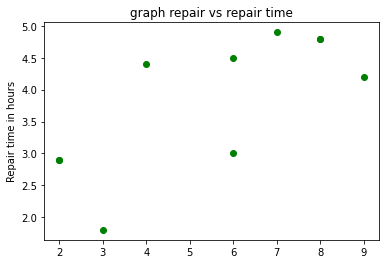

In [42]:
plt.scatter(data['months_since_last_repair'],data['repair_time_in_hour'],color='green')
plt.ylabel('Repair time in hours')
plt.title('graph repair vs repair time')

In [44]:
model = ols(formula='repair_time_in_hour ~ months_since_last_repair',data=data)
result = model.fit()
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     repair_time_in_hour   R-squared:                       0.534
Model:                             OLS   Adj. R-squared:                  0.476
Method:                  Least Squares   F-statistic:                     9.174
Date:                 Sun, 28 Feb 2021   Prob (F-statistic):             0.0163
Time:                         13:18:05   Log-Likelihood:                -10.602
No. Observations:                   10   AIC:                             25.20
Df Residuals:                        8   BIC:                             25.81
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept     

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


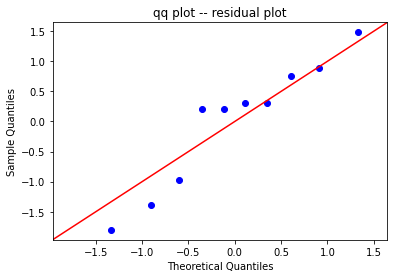

In [45]:
res = result.resid
probplot = sm.ProbPlot(res,stats.norm,fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qq plot -- residual plot')
plt.show()

In [46]:
just_dummies = pd.get_dummies(data['type_of_repair'])
just_dummies

,e,m
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [50]:
step_1 = pd.concat([data,just_dummies] , axis=1)
step_1.drop(['type_of_repair','m'], inplace=True,axis=1)


,months_since_last_repair,repair_time_in_hour,e
0,2,2.9,1
1,6,3.0,0
2,8,4.8,1
3,3,1.8,0
4,2,2.9,1
5,7,4.9,1
6,9,4.2,0
7,8,4.8,0
8,4,4.4,1
9,6,4.5,1


In [51]:
# multiple linear regression 
model2 = ols(formula = 'repair_time_in_hour ~ months_since_last_repair + e' , data = step_1)
result2 = model2.fit()
print(result2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                             OLS Regression Results                            
Dep. Variable:     repair_time_in_hour   R-squared:                       0.859
Model:                             OLS   Adj. R-squared:                  0.819
Method:                  Least Squares   F-statistic:                     21.36
Date:                 Sun, 28 Feb 2021   Prob (F-statistic):            0.00105
Time:                         13:28:48   Log-Likelihood:                -4.6200
No. Observations:                   10   AIC:                             15.24
Df Residuals:                        7   BIC:                             16.15
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept     

In [52]:
# multiple regression for saalry male and female